In [1]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.images.shape

(1797, 8, 8)

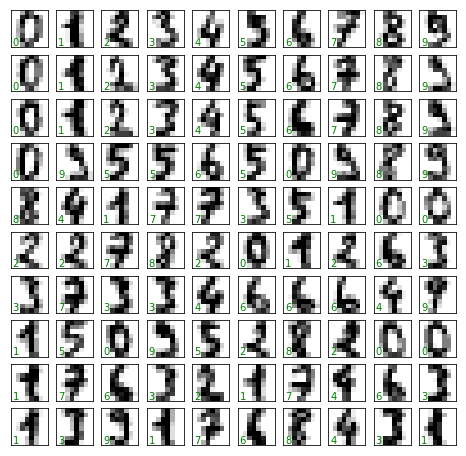

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes, color='green')

In [3]:
X=digits.data
X.shape

(1797, 64)

In [4]:
y=digits.target
y.shape

(1797,)

In [9]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y,random_state=0)
model=RandomForestClassifier(n_estimators=2000)
model.fit(Xtrain, ytrain)
ypred=model.predict(Xtest)

In [10]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



Text(91.68,0.5,'predicted label')

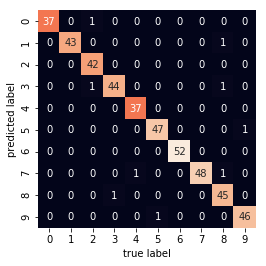

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
from sklearn.datasets import load_boston
from matplotlib.colors import ListedColormap,colorConverter,LinearSegmentedColormap
cm_cycle=ListedColormap(['#000aa','#ff5050','#9040a0','fff000'])
%matplotlib inline
boston=load_boston()
x=boston.data
y=boston.target

In [13]:
print('keys of iris_dataset:\n{}'.format(boston.keys()))

keys of iris_dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [14]:
boston.DESCR.split('\n')

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [32]:
boston_df=pd.DataFrame(boston['data'],columns=boston.feature_names)
boston_df['Target']=pd.DataFrame(boston['target'],columns=['Target'])
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [16]:
boston_df.corr().sort_values(by=['Target'],ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
Target,-0.385832,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.377365,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


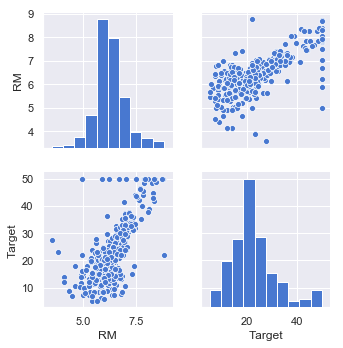

In [33]:
import seaborn as sns
sns.set(palette='muted',color_codes=True)
sns.pairplot(boston_df,vars=['RM','Target'])

In [34]:
x=boston.data
y=boston.target
X=x[y<50.0]
Y=y[y<50.0]
print(X.shape)

(490, 13)


In [36]:
print(Y.shape)

(490,)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=500)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lin_reg.score(X_test,y_test)

0.7255097639822203

In [23]:
lin_reg.coef_

array([-1.22096140e-01,  3.24934065e-02, -4.51945652e-02,  6.32525034e-02,
       -1.17444911e+01,  3.61793376e+00, -2.00394486e-02, -1.21059188e+00,
        2.47235697e-01, -1.31042159e-02, -8.35556922e-01,  8.18076684e-03,
       -3.81616606e-01])

In [24]:
lin_reg.intercept_

32.73189970831902

In [25]:
np.argsort(lin_reg.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  3,  8,  5], dtype=int64)